In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#preprocessing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
#base model
base_model = Sequential()
base_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Flatten())
base_model.add(Dense(128, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(10, activation='softmax'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
base_history = base_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.3353 - accuracy: 0.9014 - val_loss: 0.0885 - val_accuracy: 0.9729
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.1212 - accuracy: 0.9649 - val_loss: 0.0591 - val_accuracy: 0.9808
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0864 - accuracy: 0.9747 - val_loss: 0.0491 - val_accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.0465 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0619 - accuracy: 0.9817 - val_loss: 0.0440 - val_accuracy: 0.9846
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0419 - val_accuracy: 0.9862
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0398 - val_accuracy:

In [6]:
#frozen model
frozen_model = Sequential()
frozen_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), trainable=False))
frozen_model.add(MaxPooling2D(pool_size=(2, 2)))
frozen_model.add(Flatten())
frozen_model.add(Dense(128, activation='relu', trainable=False))
frozen_model.add(Dropout(0.5, trainable=False))
frozen_model.add(Dense(10, activation='softmax'))
frozen_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
frozen_history = frozen_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 2.0422 - accuracy: 0.4733 - val_loss: 1.7902 - val_accuracy: 0.7505
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 1.6599 - accuracy: 0.6424 - val_loss: 1.4538 - val_accuracy: 0.7932
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 1.4202 - accuracy: 0.6717 - val_loss: 1.2283 - val_accuracy: 0.8115
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 1.2669 - accuracy: 0.6852 - val_loss: 1.0733 - val_accuracy: 0.8273
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 1.1671 - accuracy: 0.6961 - val_loss: 0.9618 - val_accuracy: 0.8364
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 1.0923 - accuracy: 0.7023 - val_loss: 0.8781 - val_accuracy: 0.8430
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 1.0389 - accuracy: 0.7071 - val_loss: 0.8139 - val_accuracy: 0.8474

In [8]:
#unfrozen model
unfrozen_model = Sequential()
unfrozen_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), trainable=False))
unfrozen_model.add(MaxPooling2D(pool_size=(2, 2)))
unfrozen_model.add(Flatten())
unfrozen_model.add(Dense(128, activation='relu', trainable=True))
unfrozen_model.add(Dropout(0.5, trainable=True))
unfrozen_model.add(Dense(10, activation='softmax'))
unfrozen_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
unfrozen_history = unfrozen_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.4194 - accuracy: 0.8812 - val_loss: 0.1606 - val_accuracy: 0.9549
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1982 - accuracy: 0.9421 - val_loss: 0.1057 - val_accuracy: 0.9703
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1494 - accuracy: 0.9568 - val_loss: 0.0829 - val_accuracy: 0.9749
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1229 - accuracy: 0.9644 - val_loss: 0.0710 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1070 - accuracy: 0.9685 - val_loss: 0.0637 - val_accuracy: 0.9806
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0927 - accuracy: 0.9725 - val_loss: 0.0592 - val_accuracy: 0.9819
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0868 - accuracy: 0.9743 - val_loss: 0.0558 - val_accuracy:

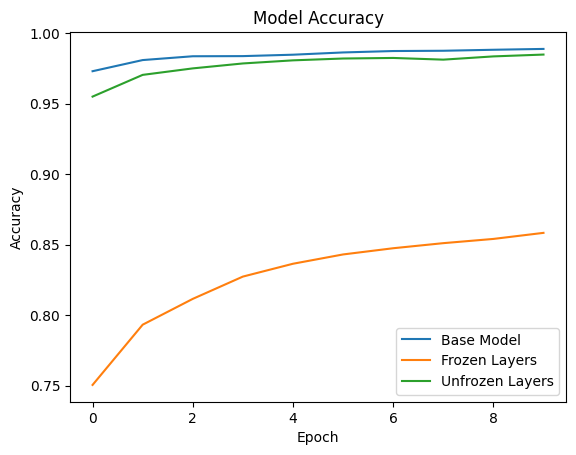

In [10]:
plt.plot(base_history.history['val_accuracy'], label='Base Model')
plt.plot(frozen_history.history['val_accuracy'], label='Frozen Layers')
plt.plot(unfrozen_history.history['val_accuracy'], label='Unfrozen Layers')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
